In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/svm-classification/SVM_Classification.R
/kaggle/input/svm-classification/Activity Sheet.docx
/kaggle/input/svm-classification/UniversalBank.csv


**Exploratory Data Analysis (EDA)**

In [2]:
data = pd.read_csv('../input/svm-classification/UniversalBank.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Drop columns which are not necessary
data.drop(["ID","ZIP Code"],axis=1,inplace=True)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
data.shape

(5000, 12)

There are 5000 rows and 12 columns in the data set now. 14 columns were reduced to 12 as columns "ID" and "ZIP Code" were removed as they were unnecessary for Credit Card approval.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


There is no missing value in the data set.

In [6]:
data.describe() # Summary Stats of the Data Set

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The Mean, Standard Deviation and other statistics of each feature are displayed.
It can be observed that the minimum value of the Experience feature set is -3 which may be incorrect as Experience can't be expressed as a negative value. Hence, all negative experience values need to be changed to 0 (which means no experience).

In [7]:
data[data['Experience'] < 0] = 0
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,45.083400,20.119600,73.046800,2.366600,1.915792,1.859400,56.045400,0.096000,0.10320,0.06040,0.590800,0.291000
std,12.173351,11.440484,46.479457,1.167937,1.749641,0.856842,101.460724,0.294621,0.30425,0.23825,0.491735,0.454269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,38.000000,1.000000,0.670000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,63.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.00000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.00000,1.000000,1.000000


**DATA VISUALIZATION**

Text(0.5, 1.0, 'Heatmap')

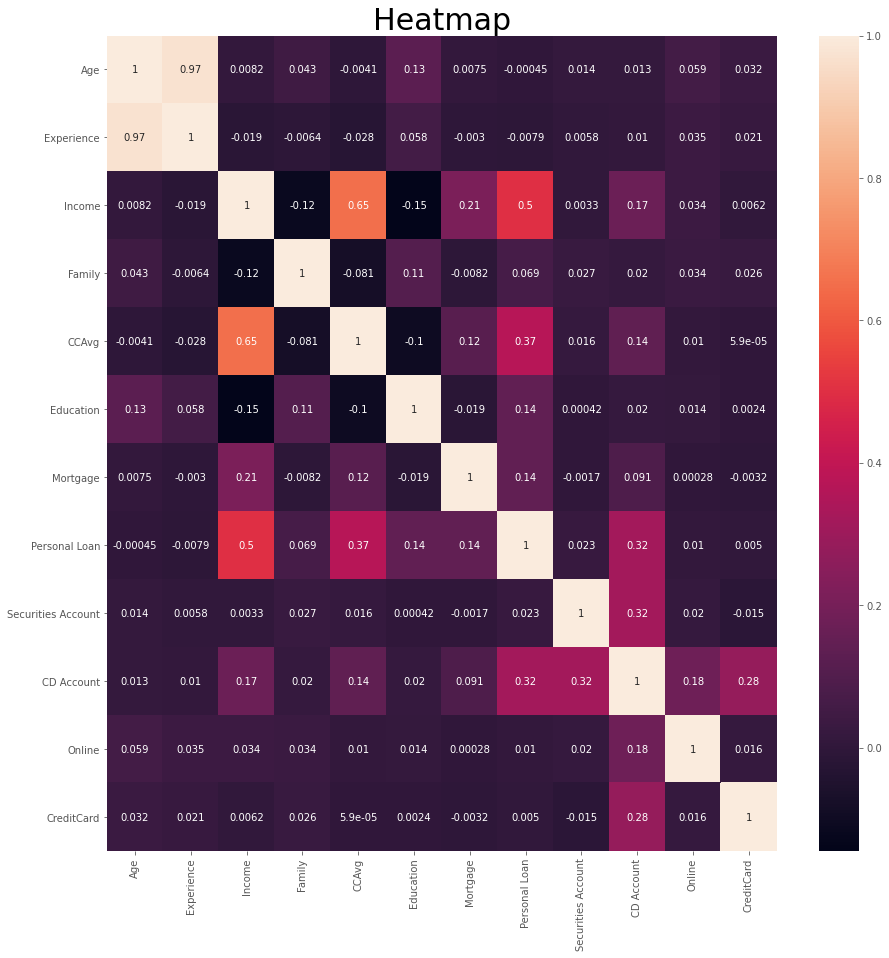

In [8]:
# Plotting the Heatmap of the Dataset
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('ggplot')
sns.heatmap(data.corr() ,annot = True)
plt.title('Heatmap', fontsize = 30)

From the above heatmap, it can be seen that 'Age' and 'Experience' have very high correlation between them. The correlation between Income and CCAvg is also quite high.
For CreditCard, features 'Age', 'Experience','Family', 'CD Amount' are useful as they are more correlated compared to other features.

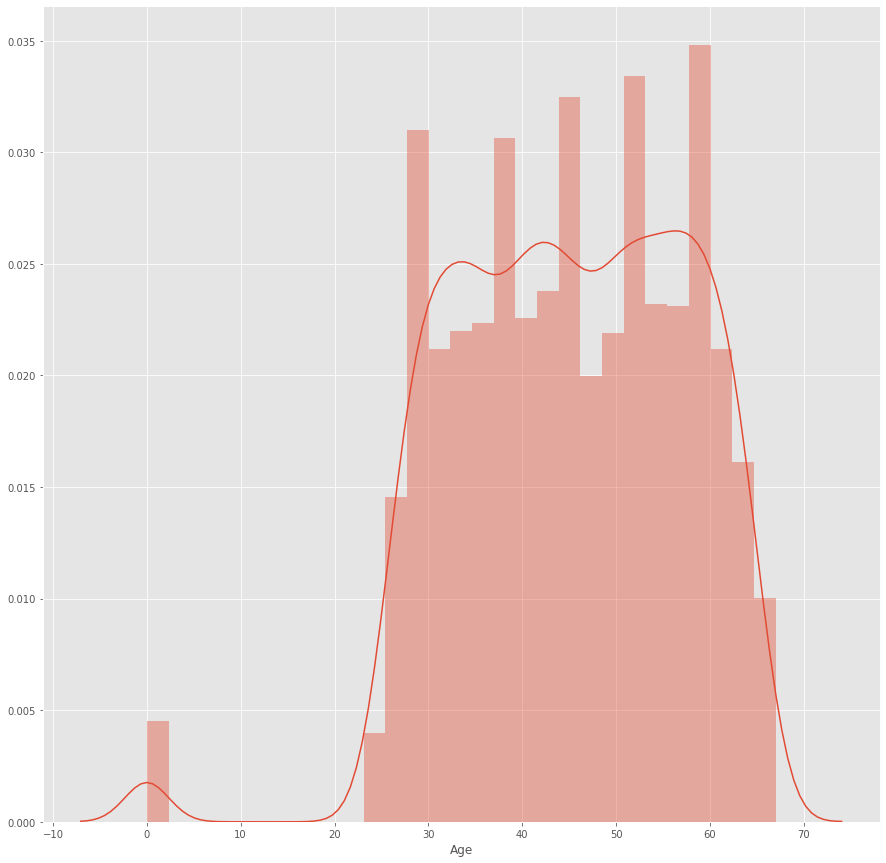

In [9]:
sns.distplot(data['Age'])

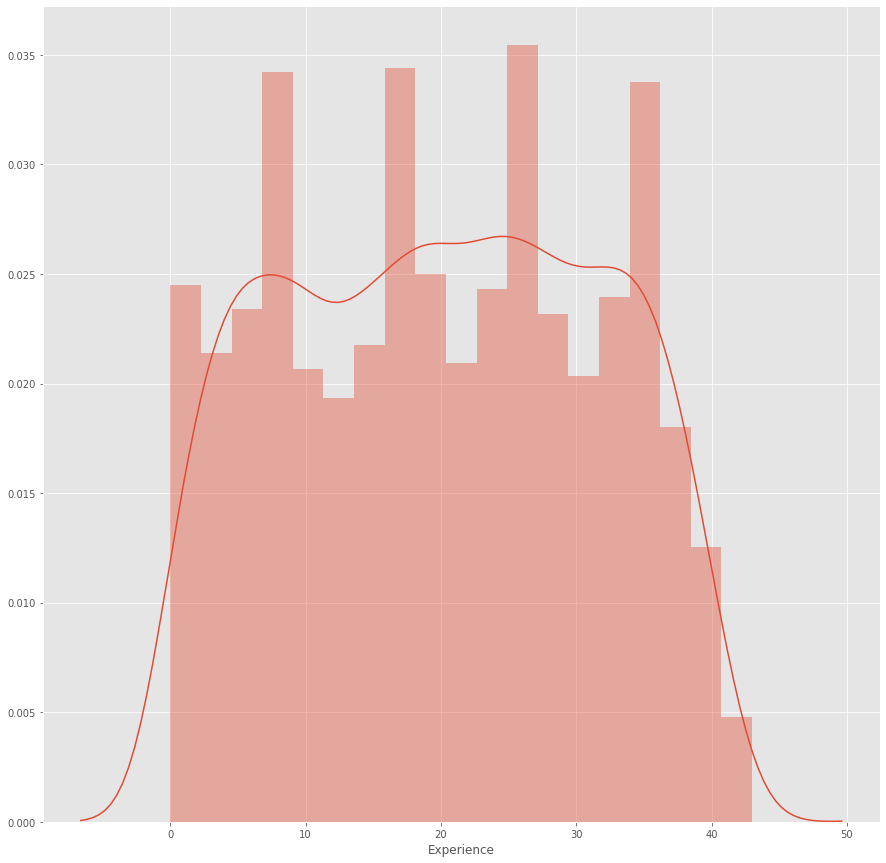

In [10]:
sns.distplot(data['Experience'])

***MODELLING***

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split the data into X and y
X = data.iloc[:,:-1]
y = data["CreditCard"]

# Split the data into trainx, testx, trainy, testy 
trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.20)

## Print the shape of X_train, X_test, y_train, y_test
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(4000, 11)
(1000, 11)
(4000,)
(1000,)


In [12]:
# Logistic Regression
X = trainx
y = trainy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X , y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
parameters = model.coef_

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
print(accuracy)
print(parameters)
print(model)

0.7465
[[ 5.10899068e-03 -4.76789785e-03 -2.51356413e-03  9.59861820e-03
  -2.37965897e-02 -6.41137903e-02 -6.74523048e-04 -3.33117374e-02
  -4.96969172e-01  3.13170906e+00 -2.65313817e-01]]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [14]:
model.fit(testx , testy)
predicted_classes_test = model.predict(testx)
accuracy = accuracy_score(testy,predicted_classes_test)
print(accuracy)

0.737


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(X , y)

NB_train_pred = NB.predict(X)
print(accuracy_score(y,NB_train_pred))

NB_test_pred = NB.predict(testx)
print(accuracy_score(testy,NB_test_pred))

0.7465
0.737
